# Data Mining Project1: Classification 
- e-mail:niejy20@lzu.edu.cn
- data：March 13th

## 1.1 数据集简介

### MiniBooNE 数据集

- MiniBooNE 数据集取自 MiniBooNE 实验，用于区分电子中微子（信号）和μ子中微子（背景）。
- 该数据集包含大量事件，每个事件有 50 个特征，用于描述中微子的特性。
- 数据集的第一行包含信号事件和背景事件的数量。

### Breast Cancer Wisconsin 数据集

- 该数据集用于帮助诊断乳房肿块是良性（Benign）还是恶性（Malignant），即是否为乳腺癌。
- 数据集中包含569个样本，每个样本有30个特征。
- 特征是从细胞核图像中提取的，包括半径、纹理、周长、面积、平滑度、紧凑度、凹度、凹点、对称性和分形维数等。

### 数据集对比

| 特征 | MiniBooNE 数据集 | Breast Cancer Wisconsin 数据集 |
|------|------------------|--------------------------------|
| 数据量 | 130,065 个样本 | 569 个样本 |
| 特征数量 | 50 个特征 | 30 个特征 |
| 应用领域 | 中微子物理实验 | 医学诊断 |
| 分类任务 | 二分类（信号 vs 背景） | 二分类（良性 vs 恶性） |

- 通过对比可以看出，MiniBooNE 数据集在数据量上远大于 Breast Cancer Wisconsin 数据集。
- 由于Breast Cancer数据集数据量比较小，所以在后续的模型评估环节，我发现很多分类算法都出现了过拟合的趋势，MiniBooNE则没有。

## 1.2 分类算法简介

分类算法可以根据不同的特点和学习方式来进行区分。以下是4种常见的分类方式：

### 一、基于学习方式

| 分类依据 | 常见算法 | 特点 |
| --- | --- | --- |
| 监督学习 | 决策树、逻辑回归、支持向量机、朴素贝叶斯等 | 从带标签的数据中学习，映射函数将输入数据映射到已知的输出标签 |
| 无监督学习 | k-均值聚类、层次聚类、高斯混合模型等 | 不依赖标记的训练数据，可以对数据进行聚类或降维等操作 |
| 半监督学习 | 自训练算法、多视图训练算法等 | 结合少量有标签数据和大量无标签数据进行学习，通过无标签数据来提高模型的性能 |
| 强化学习 | Q-learning、策略梯度方法等 | 通过与环境的交互来学习最优的行为策略，以最大化累积奖励 |

### 二、基于模型复杂度

| 分类依据 | 常见算法 | 特点 |
| --- | --- | --- |
| 简单模型 | 逻辑回归、决策树桩等 | 结构简单，训练和预测速度快，易于理解和解释，适用于数据规模较小或特征较少的情况 |
| 集成模型 | 随机森林、AdaBoost、梯度提升树、XGBoost等 | 组合多个弱学习器以构建强大的模型，能够提高模型的准确性和泛化能力，但模型复杂度较高，训练和预测时间较长 |

### 三、基于数据特点

| 分类依据 | 常见算法 | 特点 |
| --- | --- | --- |
| 线性可分数据 | 逻辑回归、线性支持向量机等 | 适用于数据在特征空间中线性可分的情况，通过寻找一个线性决策边界来区分不同类别的样本 |
| 非线性数据 | 决策树、支持向量机（非线性核函数）、神经网络等 | 适用于数据在特征空间中非线性可分的情况，能够学习复杂的非线性决策边界 |

### 四、基于模型可解释性

| 分类依据 | 常见算法 | 特点 |
| --- | --- | --- |
| 可解释模型 | 决策树、逻辑回归等 | 模型的决策过程易于理解和解释，能够提供直观的特征重要性和决策规则 |
| 黑盒模型 | 神经网络、梯度提升树等 | 模型的内部结构和决策过程较为复杂，可解释性差，但通常具有较高的预测性能|

在本次project中，共使用了10种用于分类任务的算法，这些算法的简介如下：

1. Logistic Regression：基于逻辑函数（Sigmoid函数）建模，输出概率值，能够提供可解释的特征权重。

2. k-NN（k-近邻算法）：懒惰学习（lazy learning），在预测阶段才进行计算，不显式训练模型。

3. Decision Tree：易于理解和解释，能够处理非线性关系，无需数据归一化。

4. Decision Stump：极其简单，计算效率高，但表达能力有限。

5. Random Forest：通过随机抽样和特征选择来降低过拟合风险，提高模型的泛化能力。

6. AdaBoost（自适应提升算法）：强调对分类错误的样本给予更高的权重，使得后续学习器更关注这些样本。

7. XGBoost（极端梯度提升）：高效、可扩展，支持自动处理缺失值，提供多种正则化选项。

8. LDA（Linear Discriminant Analysis）：假设数据服从高斯分布，计算类内和类间散度矩阵。

9. Naive Bayes：计算概率模型，对缺失数据具有鲁棒性，无需复杂的训练过程。

10. Maximal Entropy Model：在给定约束条件下选择最不确定的分布，避免过度拟合。

## 1.3 格式说明

**为方便批阅时独立运行各个cell的代码，大部分cell未进行封装**（如import导入库、定义评估模型、归一化这些操作）。

2.2、2.3两个cell展示了最核心的两步：定义模型、输出模型性能评估。

## 2.1 Logistic Regression + MiniBooNE

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt

df=pd.read_csv('MiniBooNE_PID.txt',sep=' ',header=None,skiprows=1,skipinitialspace=True)

file=open('MiniBooNE_PID.txt')
y=file.readline()
file.close()
numlabels=[int(s) for s in y.split()]
ylabels=numlabels[0]*[1] + numlabels[1]*[0]
Y=np.array(ylabels)
X=df.to_numpy()
scaler=MinMaxScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_scaled,Y,random_state=0)

def evaluate(y_test,y_pred,y_pred_proba):
    cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
    print('The confusion matrix for the given model is: ')
    print(cnf_matrix)
    print('accuracy : ',metrics.accuracy_score(y_test,y_pred))
    print('precision : ',metrics.precision_score(y_test,y_pred))
    print('recall : ',metrics.recall_score(y_test,y_pred))
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr,tpr,label='Area under the curve= '+str(auc))
    plt.legend(loc=4)
    plt.title('ROC curve')
    plt.xlabel('False positive rate')
    plt.ylabel('True Positive rate')

The score for this model is:  0.8626829868372493
the best value of parameter C is:  {'C': 100}
The confusion matrix for the given model is: 
[[22089  1363]
 [ 3102  5962]]
accuracy :  0.8626829868372493
precision :  0.8139249146757679
recall :  0.6577669902912622


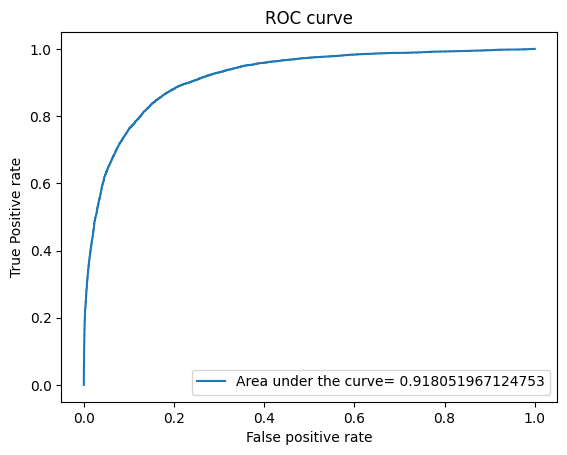

In [31]:
from sklearn.linear_model import LogisticRegression

# 定义模型
lr=LogisticRegression(random_state=0,max_iter=5000)
C_range={'C':[100]}
clf=GridSearchCV(lr,C_range).fit(X_train,y_train)

# 输出模型性能
print('The score for this model is: ',clf.score(X_test,y_test))
print('the best value of parameter C is: ',clf.best_params_)
y_pred=clf.predict(X_test)
y_pred_proba=clf.predict_proba(X_test)[::,1]

# 评估模型
evaluate(y_test,y_pred,y_pred_proba)

## 2.2 K-nearest neighbors(Knn) + MiniBooNE

The score for this model is:  0.8901463894697995
the best value of parameters is:  {'n_neighbors': 14}
The confusion matrix for the given model is: 
[[21821  1631]
 [ 1941  7123]]
accuracy :  0.8901463894697995
precision :  0.8136851724925748
recall :  0.785856134157105


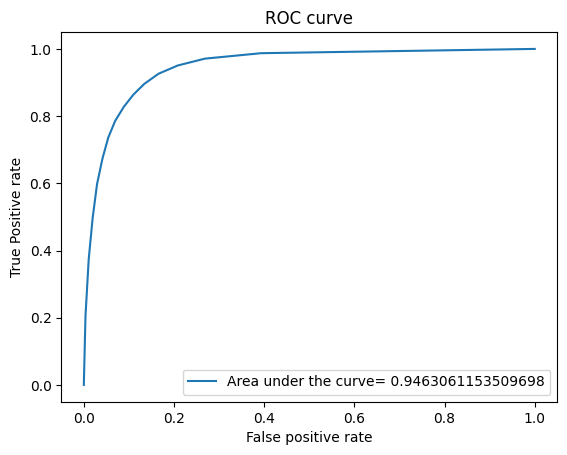

In [32]:
from sklearn.neighbors import KNeighborsClassifier

# 定义模型
knn=KNeighborsClassifier()
parameters_knn={'n_neighbors':[1,5,10,14]}
clf=GridSearchCV(knn,parameters_knn).fit(X_train,y_train)

# 输出模型性能
print('The score for this model is: ',clf.score(X_test,y_test))
print('the best value of parameters is: ',clf.best_params_)
y_pred=clf.predict(X_test)
y_pred_proba=clf.predict_proba(X_test)[::,1]

# 评估模型
evaluate(y_test,y_pred,y_pred_proba)

## 2.3 Decision Trees + MiniBooNE 

The score for this model is:  0.908475827285029
the best value of parameters is:  {'max_depth': 10}
The confusion matrix for the given model is: 
[[21858  1594]
 [ 1382  7682]]
accuracy :  0.908475827285029
precision :  0.828158689090125
recall :  0.8475286849073257


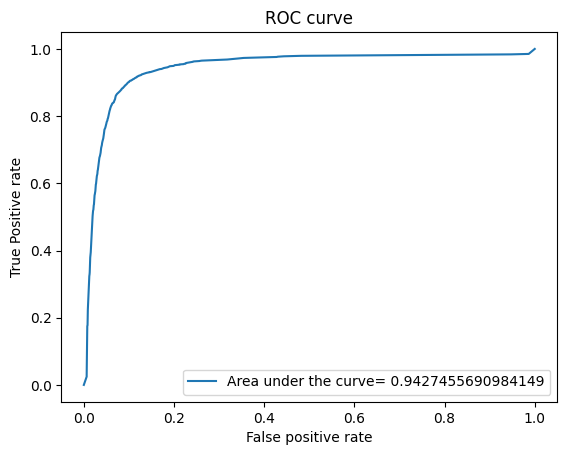

In [33]:
from sklearn import tree

# 定义模型
dt=tree.DecisionTreeClassifier()
parameters_dt={'max_depth':[5,10,15]}
clf=GridSearchCV(dt,parameters_dt).fit(X_train,y_train)

# 输出模型性能
print('The score for this model is: ',clf.score(X_test,y_test))
print('the best value of parameters is: ',clf.best_params_)
y_pred=clf.predict(X_test)
y_pred_proba=clf.predict_proba(X_test)[::,1]

# 评估模型
evaluate(y_test,y_pred,y_pred_proba)

## 2.4 Decision Stump + MiniBooNE 

The score for this model is:  0.8315290933694182
the best parameters are:  {'criterion': 'gini'}
The confusion matrix for the given model is: 
[[21625  1827]
 [ 3651  5413]]
accuracy :  0.8315290933694182
precision :  0.7476519337016575
recall :  0.597197705207414


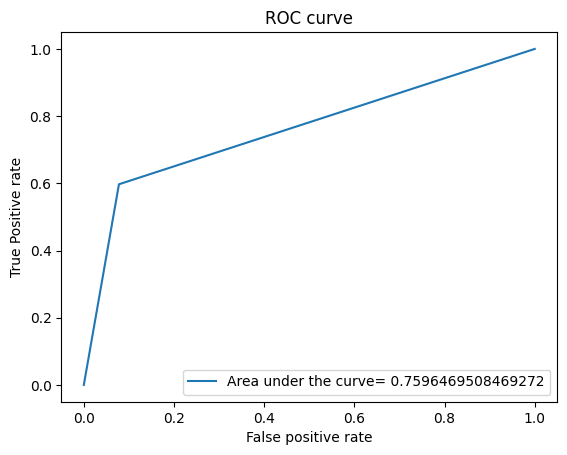

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt

# 读取数据集
df = pd.read_csv('MiniBooNE_PID.txt', sep=' ', header=None, skiprows=1, skipinitialspace=True)

# 读取标签信息
file = open('MiniBooNE_PID.txt')
y = file.readline()
file.close()
numlabels = [int(s) for s in y.split()]
ylabels = numlabels[0] * [1] + numlabels[1] * [0]
Y = np.array(ylabels)

# 数据预处理
X = df.to_numpy()
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, random_state=0)

# 定义模型
decision_stump = DecisionTreeClassifier(max_depth=1, random_state=0)

# 定义超参数范围
param_grid = {
    'criterion': ['gini', 'entropy']
}

# 使用 GridSearchCV 进行超参数调优
clf = GridSearchCV(decision_stump, param_grid).fit(X_train, y_train)

# 输出模型性能
print('The score for this model is: ', clf.score(X_test, y_test))
print('the best parameters are: ', clf.best_params_)

# 模型预测
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# 定义评估函数
def evaluate(y_test, y_pred, y_pred_proba):
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print('The confusion matrix for the given model is: ')
    print(cnf_matrix)
    print('accuracy : ', metrics.accuracy_score(y_test, y_pred))
    print('precision : ', metrics.precision_score(y_test, y_pred))
    print('recall : ', metrics.recall_score(y_test, y_pred))
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, label='Area under the curve= ' + str(auc))
    plt.legend(loc=4)
    plt.title('ROC curve')
    plt.xlabel('False positive rate')
    plt.ylabel('True Positive rate')

# 调用评估函数
evaluate(y_test, y_pred, y_pred_proba)

## 2.5 Random Forest + MiniBooNE 

The score for this model is:  0.9244372001476197
the best parameters are:  {'max_depth': 10, 'max_samples': 40000, 'n_estimators': 100}
The confusion matrix for the given model is: 
[[22330  1122]
 [ 1335  7729]]
accuracy :  0.9244372001476197
precision :  0.8732346627499717
recall :  0.8527140335392762


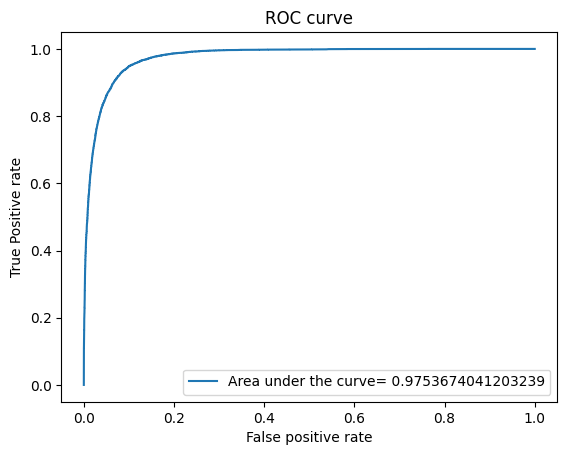

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt

# 读取数据集
df = pd.read_csv('MiniBooNE_PID.txt', sep=' ', header=None, skiprows=1, skipinitialspace=True)

# 读取标签信息
file = open('MiniBooNE_PID.txt')
y = file.readline()
file.close()
numlabels = [int(s) for s in y.split()]
ylabels = numlabels[0] * [1] + numlabels[1] * [0]
Y = np.array(ylabels)

# 数据预处理
X = df.to_numpy()
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, random_state=0)

# 定义模型
rf=RandomForestClassifier(bootstrap=True)
parameters_rf={'n_estimators':[10,50,100],'max_depth':[5,10],'max_samples':[30000,40000]}
clf=GridSearchCV(rf,parameters_rf).fit(X_train,y_train)

# 定义超参数范围
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# 输出模型性能
print('The score for this model is: ', clf.score(X_test, y_test))
print('the best parameters are: ', clf.best_params_)

# 模型预测
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# 定义评估函数
def evaluate(y_test, y_pred, y_pred_proba):
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print('The confusion matrix for the given model is: ')
    print(cnf_matrix)
    print('accuracy : ', metrics.accuracy_score(y_test, y_pred))
    print('precision : ', metrics.precision_score(y_test, y_pred))
    print('recall : ', metrics.recall_score(y_test, y_pred))
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, label='Area under the curve= ' + str(auc))
    plt.legend(loc=4)
    plt.title('ROC curve')
    plt.xlabel('False positive rate')
    plt.ylabel('True Positive rate')

# 调用评估函数
evaluate(y_test, y_pred, y_pred_proba)

## 2.6 AdaBoost + MiniBooNE 

The score for this model is:  0.9068458604994464
the best parameters are:  {'learning_rate': 1.0, 'n_estimators': 50}
The confusion matrix for the given model is: 
[[22125  1327]
 [ 1702  7362]]
accuracy :  0.9068458604994464
precision :  0.8472781677983657
recall :  0.8122241835834069


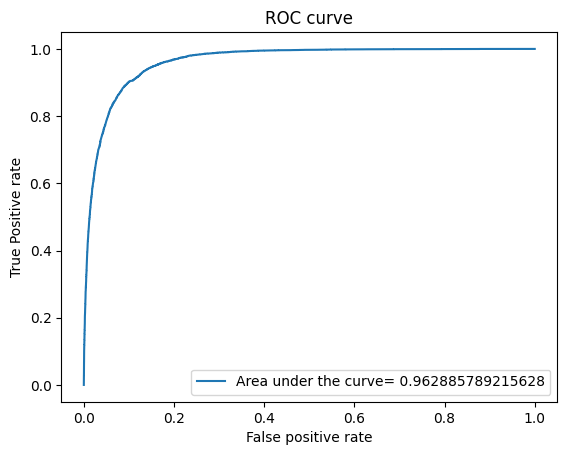

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt

# 读取数据集
df = pd.read_csv('MiniBooNE_PID.txt', sep=' ', header=None, skiprows=1, skipinitialspace=True)

# 读取标签信息
file = open('MiniBooNE_PID.txt')
y = file.readline()
file.close()
numlabels = [int(s) for s in y.split()]
ylabels = numlabels[0] * [1] + numlabels[1] * [0]
Y = np.array(ylabels)

# 数据预处理
X = df.to_numpy()
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, random_state=0)

# 定义 AdaBoost 模型，使用决策树桩作为基分类器
dt_stump = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
ada = AdaBoostClassifier(estimator=dt_stump, random_state=0)

# 定义超参数范围
param_grid = {
    'n_estimators': [50],
    'learning_rate': [0.1, 0.5, 1.0]
}

# 使用 GridSearchCV 进行超参数调优
clf = GridSearchCV(ada, param_grid).fit(X_train, y_train)

# 输出模型性能
print('The score for this model is: ', clf.score(X_test, y_test))
print('the best parameters are: ', clf.best_params_)

# 模型预测
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# 调用评估函数
evaluate(y_test, y_pred, y_pred_proba)

## 2.7 XGBoost + MiniBooNE 

The score for this model is:  0.9397527371140362
the best parameters are:  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}
The confusion matrix for the given model is: 
[[22389  1063]
 [  896  8168]]
accuracy :  0.9397527371140362
precision :  0.8848445455530278
recall :  0.9011473962930273


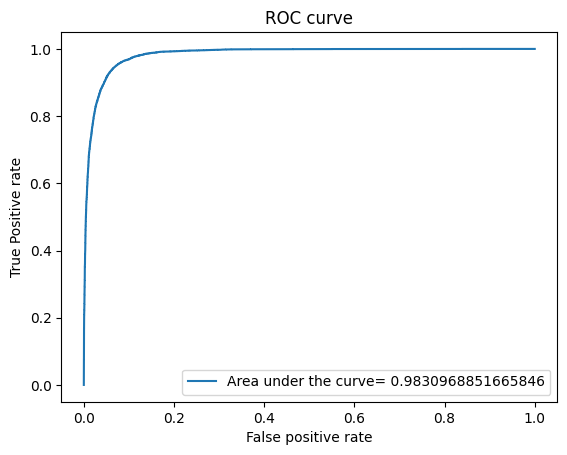

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt

import warnings

# 屏蔽部分warning信息
warnings.filterwarnings("ignore", category=UserWarning)

# 读取数据集
df = pd.read_csv('MiniBooNE_PID.txt', sep=' ', header=None, skiprows=1, skipinitialspace=True)

# 读取标签信息
file = open('MiniBooNE_PID.txt')
y = file.readline()
file.close()
numlabels = [int(s) for s in y.split()]
ylabels = numlabels[0] * [1] + numlabels[1] * [0]
Y = np.array(ylabels)

# 数据预处理
X = df.to_numpy()
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, random_state=0)

# 定义 XGBoost 模型
xgb = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss')

# 定义超参数范围
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 4]
}

# 使用 GridSearchCV 进行超参数调优
clf = GridSearchCV(xgb, param_grid).fit(X_train, y_train)

# 输出模型性能
print('The score for this model is: ', clf.score(X_test, y_test))
print('the best parameters are: ', clf.best_params_)

# 模型预测
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# 定义评估函数
def evaluate(y_test, y_pred, y_pred_proba):
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print('The confusion matrix for the given model is: ')
    print(cnf_matrix)
    print('accuracy : ', metrics.accuracy_score(y_test, y_pred))
    print('precision : ', metrics.precision_score(y_test, y_pred))
    print('recall : ', metrics.recall_score(y_test, y_pred))
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, label='Area under the curve= ' + str(auc))
    plt.legend(loc=4)
    plt.title('ROC curve')
    plt.xlabel('False positive rate')
    plt.ylabel('True Positive rate')

# 调用评估函数
evaluate(y_test, y_pred, y_pred_proba)

## 2.8 LDA + MiniBooNE 

The score for this model is:  0.9039549760118095
the best parameters are:  {'shrinkage': None, 'solver': 'eigen'}
The confusion matrix for the given model is: 
[[22127  1325]
 [ 1798  7266]]
accuracy :  0.9039549760118095
precision :  0.8457688278430916
recall :  0.8016328331862312


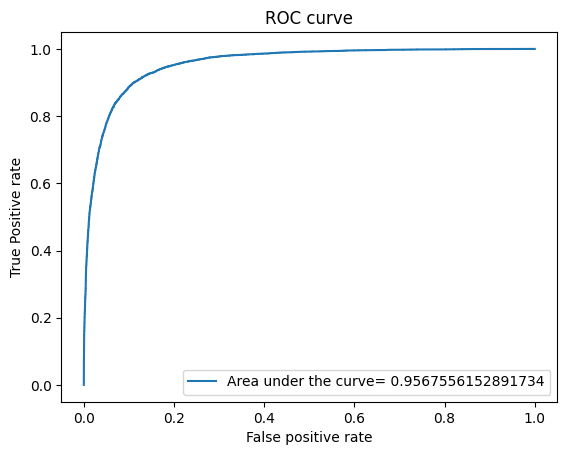

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import FitFailedWarning
warnings.filterwarnings("ignore", category=FitFailedWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# 读取数据集
df = pd.read_csv('MiniBooNE_PID.txt', sep=' ', header=None, skiprows=1, skipinitialspace=True)

# 读取标签信息
file = open('MiniBooNE_PID.txt')
y = file.readline()
file.close()
numlabels = [int(s) for s in y.split()]
ylabels = numlabels[0] * [1] + numlabels[1] * [0]
Y = np.array(ylabels)

# 数据预处理
X = df.to_numpy()
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, random_state=0)

# 定义LDA模型
lda = LinearDiscriminantAnalysis()

# 定义超参数范围
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': [None, 'auto', 0.1, 0.5]
}

# 使用GridSearchCV进行超参数调优
clf = GridSearchCV(lda, param_grid).fit(X_train, y_train)

# 输出模型性能
print('The score for this model is: ', clf.score(X_test, y_test))
print('the best parameters are: ', clf.best_params_)

# 模型预测
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# 定义评估函数
def evaluate(y_test, y_pred, y_pred_proba):
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print('The confusion matrix for the given model is: ')
    print(cnf_matrix)
    print('accuracy : ', metrics.accuracy_score(y_test, y_pred))
    print('precision : ', metrics.precision_score(y_test, y_pred))
    print('recall : ', metrics.recall_score(y_test, y_pred))
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, label='Area under the curve= ' + str(auc))
    plt.legend(loc=4)
    plt.title('ROC curve')
    plt.xlabel('False positive rate')
    plt.ylabel('True Positive rate')

# 调用评估函数
evaluate(y_test, y_pred, y_pred_proba)

## 2.9 Naive Bayes + MiniBooNE 

The score for this model is:  0.2821687784475335
the best parameters are:  {'var_smoothing': 1e-08}
The confusion matrix for the given model is: 
[[  116 23336]
 [    5  9059]]
accuracy :  0.2821687784475335
precision :  0.2796419200493903
recall :  0.9994483671668137


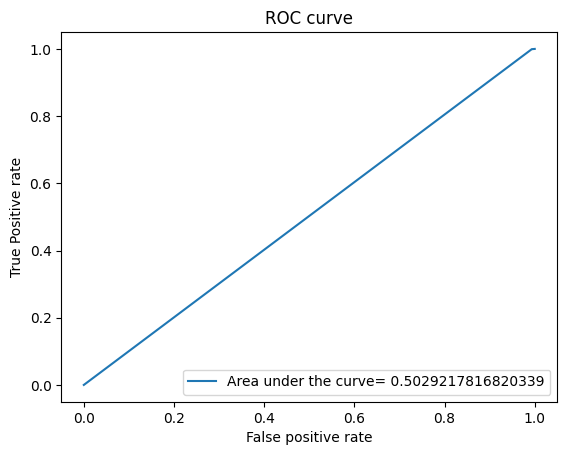

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt

# 读取数据集
df = pd.read_csv('MiniBooNE_PID.txt', sep=' ', header=None, skiprows=1, skipinitialspace=True)

# 读取标签信息
file = open('MiniBooNE_PID.txt')
y = file.readline()
file.close()
numlabels = [int(s) for s in y.split()]
ylabels = numlabels[0] * [1] + numlabels[1] * [0]
Y = np.array(ylabels)

# 数据预处理
X = df.to_numpy()
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, random_state=0)

# 定义朴素贝叶斯模型
nb = GaussianNB()

# 定义超参数范围
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

# 使用 GridSearchCV 进行超参数调优
clf = GridSearchCV(nb, param_grid).fit(X_train, y_train)

# 输出模型性能
print('The score for this model is: ', clf.score(X_test, y_test))
print('the best parameters are: ', clf.best_params_)

# 模型预测
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# 定义评估函数
def evaluate(y_test, y_pred, y_pred_proba):
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print('The confusion matrix for the given model is: ')
    print(cnf_matrix)
    print('accuracy : ', metrics.accuracy_score(y_test, y_pred))
    print('precision : ', metrics.precision_score(y_test, y_pred))
    print('recall : ', metrics.recall_score(y_test, y_pred))
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, label='Area under the curve= ' + str(auc))
    plt.legend(loc=4)
    plt.title('ROC curve')
    plt.xlabel('False positive rate')
    plt.ylabel('True Positive rate')

# 调用评估函数
evaluate(y_test, y_pred, y_pred_proba)

## 2.10 Maximal Entropy Model + MiniBooNE 

The score for this model is:  0.8500430557264116
the best parameters are:  {'C': 10, 'penalty': 'l2'}
The confusion matrix for the given model is: 
[[22055  1397]
 [ 3479  5585]]
accuracy :  0.8500430557264116
precision :  0.7999140647378975
recall :  0.6161738746690203


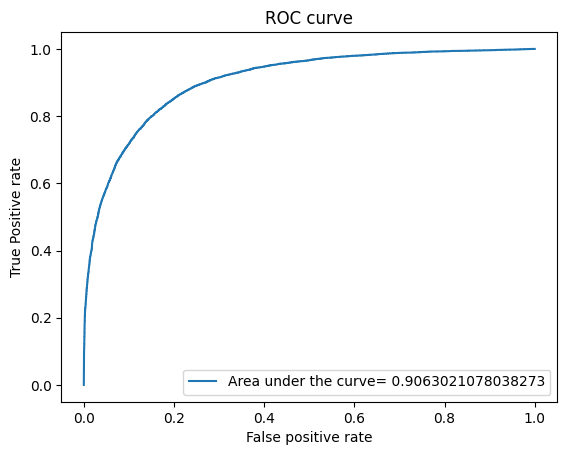

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt

# 读取数据集
df = pd.read_csv('MiniBooNE_PID.txt', sep=' ', header=None, skiprows=1, skipinitialspace=True)

# 读取标签信息
file = open('MiniBooNE_PID.txt')
y = file.readline()
file.close()
numlabels = [int(s) for s in y.split()]
ylabels = numlabels[0] * [1] + numlabels[1] * [0]
Y = np.array(ylabels)

# 数据预处理
X = df.to_numpy()
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, random_state=0)

# 定义最大熵模型（通过逻辑回归实现）
maxent = LogisticRegression(random_state=0)

# 定义超参数范围
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l2']
}

# 使用 GridSearchCV 进行超参数调优
clf = GridSearchCV(maxent, param_grid).fit(X_train, y_train)

# 输出模型性能
print('The score for this model is: ', clf.score(X_test, y_test))
print('the best parameters are: ', clf.best_params_)

# 模型预测
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# 定义评估函数
def evaluate(y_test, y_pred, y_pred_proba):
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print('The confusion matrix for the given model is: ')
    print(cnf_matrix)
    print('accuracy : ', metrics.accuracy_score(y_test, y_pred))
    print('precision : ', metrics.precision_score(y_test, y_pred))
    print('recall : ', metrics.recall_score(y_test, y_pred))
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, label='Area under the curve= ' + str(auc))
    plt.legend(loc=4)
    plt.title('ROC curve')
    plt.xlabel('False positive rate')
    plt.ylabel('True Positive rate')

# 调用评估函数
evaluate(y_test, y_pred, y_pred_proba)

## 3.1 Logistic Regression + Breast Cancer

The score for this model is:  0.965034965034965
the best parameters are:  {'C': 10, 'penalty': 'l2'}
The confusion matrix for the given model is: 
[[89  1]
 [ 4 49]]
accuracy :  0.965034965034965
precision :  0.98
recall :  0.9245283018867925


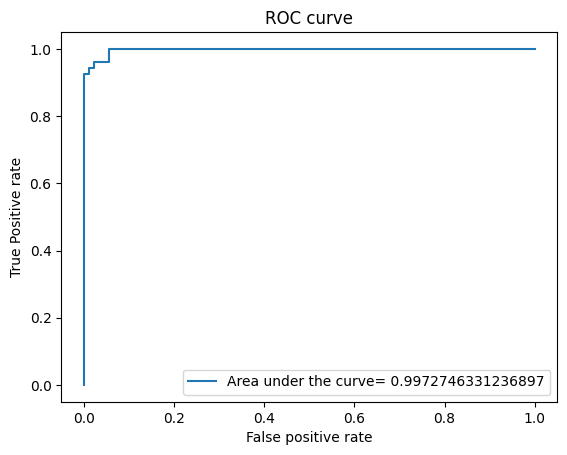

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt

# 读取数据集
data = pd.read_csv('wdbc.data', header=None)

# 数据预处理
# 第一列是样本ID，第二列是诊断结果（B=良性，M=恶性），第三列及以后是特征值
X = data.iloc[:, 2:].values  # 特征
y = data.iloc[:, 1].values   # 标签

# 将标签转换为二进制数值（B=0，M=1）
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# 数据归一化
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)

# 定义逻辑回归模型
logreg = LogisticRegression(random_state=0, max_iter=1000)

# 定义超参数范围
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l2']
}

# 使用 GridSearchCV 进行超参数调优
clf = GridSearchCV(logreg, param_grid).fit(X_train, y_train)

# 输出模型性能
print('The score for this model is: ', clf.score(X_test, y_test))
print('the best parameters are: ', clf.best_params_)

# 模型预测
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# 定义评估函数
def evaluate(y_test, y_pred, y_pred_proba):
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print('The confusion matrix for the given model is: ')
    print(cnf_matrix)
    print('accuracy : ', metrics.accuracy_score(y_test, y_pred))
    print('precision : ', metrics.precision_score(y_test, y_pred))
    print('recall : ', metrics.recall_score(y_test, y_pred))
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, label='Area under the curve= ' + str(auc))
    plt.legend(loc=4)
    plt.title('ROC curve')
    plt.xlabel('False positive rate')
    plt.ylabel('True Positive rate')

# 调用评估函数
evaluate(y_test, y_pred, y_pred_proba)

## 3.2 K-nearest neighbors(Knn) + Breast Cancer

The score for this model is:  0.972027972027972
the best value of parameters is:  {'n_neighbors': 10}
The confusion matrix for the given model is: 
[[90  0]
 [ 4 49]]
accuracy :  0.972027972027972
precision :  1.0
recall :  0.9245283018867925


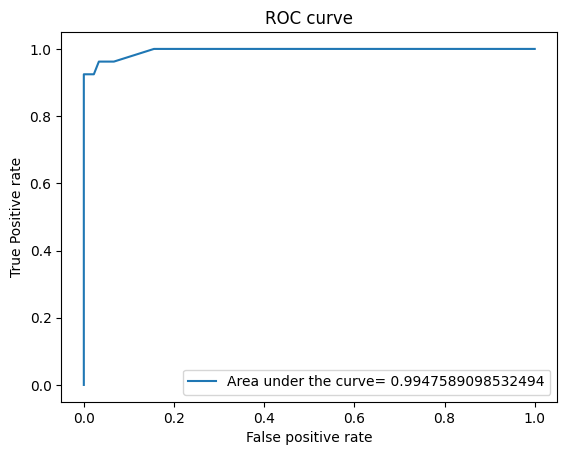

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt

# 读取数据集
data = pd.read_csv('wdbc.data', header=None)

# 数据预处理
# 第一列是样本ID，第二列是诊断结果（B=良性，M=恶性），第三列及以后是特征值
X = data.iloc[:, 2:].values  # 特征
y = data.iloc[:, 1].values   # 标签

# 将标签转换为二进制数值（B=0，M=1）
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# 数据归一化
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)

# 定义评估函数
def evaluate(y_test, y_pred, y_pred_proba):
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print('The confusion matrix for the given model is: ')
    print(cnf_matrix)
    print('accuracy : ', metrics.accuracy_score(y_test, y_pred))
    print('precision : ', metrics.precision_score(y_test, y_pred))
    print('recall : ', metrics.recall_score(y_test, y_pred))
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, label='Area under the curve= ' + str(auc))
    plt.legend(loc=4)
    plt.title('ROC curve')
    plt.xlabel('False positive rate')
    plt.ylabel('True Positive rate')

# define the model
knn=KNeighborsClassifier()
parameters_knn={'n_neighbors':[1,5,10,14]}
clf=GridSearchCV(knn,parameters_knn).fit(X_train,y_train)

# print model scores
print('The score for this model is: ',clf.score(X_test,y_test))
print('the best value of parameters is: ',clf.best_params_)
y_pred=clf.predict(X_test)
y_pred_proba=clf.predict_proba(X_test)[::,1]

# evaluate the model
evaluate(y_test,y_pred,y_pred_proba)

## 3.3 Decision Trees + Breast Cancer

The score for this model is:  0.916083916083916
the best value of parameters is:  {'max_depth': 5}
The confusion matrix for the given model is: 
[[81  9]
 [ 3 50]]
accuracy :  0.916083916083916
precision :  0.847457627118644
recall :  0.9433962264150944


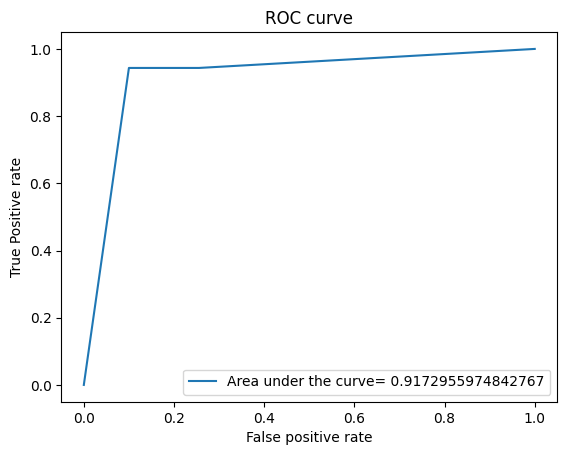

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import tree

# 读取数据集
data = pd.read_csv('wdbc.data', header=None)

# 数据预处理
# 第一列是样本ID，第二列是诊断结果（B=良性，M=恶性），第三列及以后是特征值
X = data.iloc[:, 2:].values  # 特征
y = data.iloc[:, 1].values   # 标签

# 将标签转换为二进制数值（B=0，M=1）
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# 数据归一化
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)

# 定义评估函数
def evaluate(y_test, y_pred, y_pred_proba):
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print('The confusion matrix for the given model is: ')
    print(cnf_matrix)
    print('accuracy : ', metrics.accuracy_score(y_test, y_pred))
    print('precision : ', metrics.precision_score(y_test, y_pred))
    print('recall : ', metrics.recall_score(y_test, y_pred))
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, label='Area under the curve= ' + str(auc))
    plt.legend(loc=4)
    plt.title('ROC curve')
    plt.xlabel('False positive rate')
    plt.ylabel('True Positive rate')

# define the model
dt=tree.DecisionTreeClassifier()
parameters_dt={'max_depth':[5,10,15]}
clf=GridSearchCV(dt,parameters_dt).fit(X_train,y_train)

# print model scores
print('The score for this model is: ',clf.score(X_test,y_test))
print('the best value of parameters is: ',clf.best_params_)
y_pred=clf.predict(X_test)
y_pred_proba=clf.predict_proba(X_test)[::,1]

# evaluate the model
evaluate(y_test,y_pred,y_pred_proba)

## 3.4 Decision stump + Breast Cancer

The score for this model is:  0.8811188811188811
the best parameters are:  {'criterion': 'gini'}
The confusion matrix for the given model is: 
[[78 12]
 [ 5 48]]
accuracy :  0.8811188811188811
precision :  0.8
recall :  0.9056603773584906


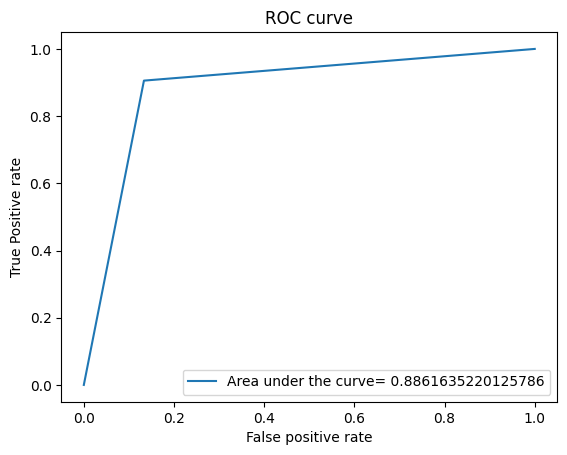

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt

# 读取数据集
data = pd.read_csv('wdbc.data', header=None)

# 数据预处理
X = data.iloc[:, 2:].values  # 特征
y = data.iloc[:, 1].values   # 标签

# 标签转换
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# 数据归一化
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)

# 定义决策树桩模型
decision_stump = DecisionTreeClassifier(max_depth=1, random_state=0)

# 定义超参数范围
param_grid = {
    'criterion': ['gini', 'entropy']
}

# 使用 GridSearchCV 进行超参数调优
clf = GridSearchCV(decision_stump, param_grid).fit(X_train, y_train)

# 输出模型性能
print('The score for this model is: ', clf.score(X_test, y_test))
print('the best parameters are: ', clf.best_params_)

# 模型预测
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# 定义评估函数
def evaluate(y_test, y_pred, y_pred_proba):
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print('The confusion matrix for the given model is: ')
    print(cnf_matrix)
    print('accuracy : ', metrics.accuracy_score(y_test, y_pred))
    print('precision : ', metrics.precision_score(y_test, y_pred))
    print('recall : ', metrics.recall_score(y_test, y_pred))
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, label='Area under the curve= ' + str(auc))
    plt.legend(loc=4)
    plt.title('ROC curve')
    plt.xlabel('False positive rate')
    plt.ylabel('True Positive rate')

# 调用评估函数
evaluate(y_test, y_pred, y_pred_proba)

## 3.5 Random Forest + Breast Cancer

The score for this model is:  0.972027972027972
the best parameters are:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
The confusion matrix for the given model is: 
[[87  3]
 [ 1 52]]
accuracy :  0.972027972027972
precision :  0.9454545454545454
recall :  0.9811320754716981


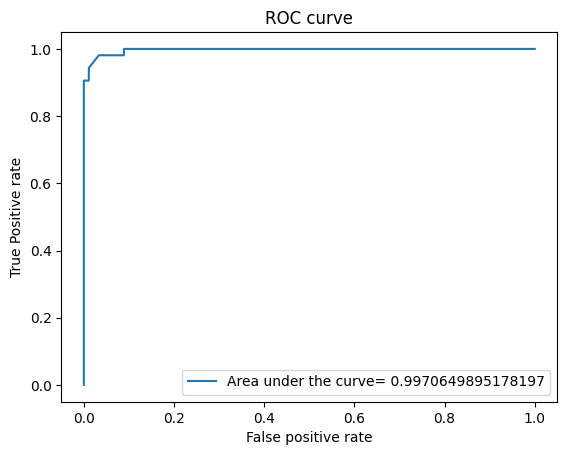

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt

# 读取数据集
data = pd.read_csv('wdbc.data', header=None)

# 数据预处理
X = data.iloc[:, 2:].values  # 特征
y = data.iloc[:, 1].values   # 标签

# 标签转换
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# 数据归一化
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)

# 定义随机森林模型
random_forest = RandomForestClassifier(random_state=0)

# 定义超参数范围
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# 使用 GridSearchCV 进行超参数调优
clf = GridSearchCV(random_forest, param_grid).fit(X_train, y_train)

# 输出模型性能
print('The score for this model is: ', clf.score(X_test, y_test))
print('the best parameters are: ', clf.best_params_)

# 模型预测
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# 定义评估函数
def evaluate(y_test, y_pred, y_pred_proba):
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print('The confusion matrix for the given model is: ')
    print(cnf_matrix)
    print('accuracy : ', metrics.accuracy_score(y_test, y_pred))
    print('precision : ', metrics.precision_score(y_test, y_pred))
    print('recall : ', metrics.recall_score(y_test, y_pred))
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, label='Area under the curve= ' + str(auc))
    plt.legend(loc=4)
    plt.title('ROC curve')
    plt.xlabel('False positive rate')
    plt.ylabel('True Positive rate')

# 调用评估函数
evaluate(y_test, y_pred, y_pred_proba)

## 3.6 AdaBoost + Breast Cancer

The score for this model is:  0.9440559440559441
the best parameters are:  {'learning_rate': 1.0, 'n_estimators': 50}
The confusion matrix for the given model is: 
[[83  7]
 [ 1 52]]
accuracy :  0.9440559440559441
precision :  0.8813559322033898
recall :  0.9811320754716981


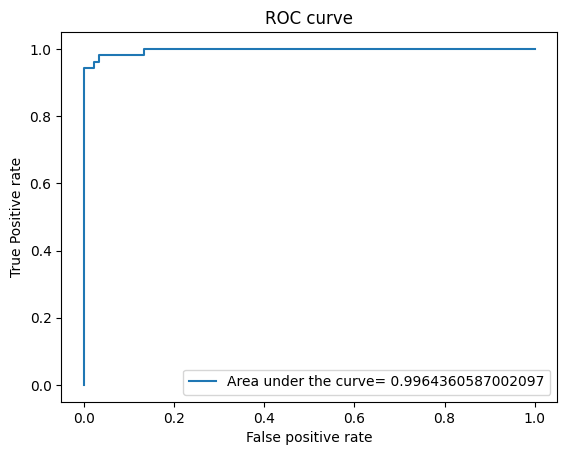

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt

# 读取数据集
data = pd.read_csv('wdbc.data', header=None)

# 数据预处理
X = data.iloc[:, 2:].values  # 特征
y = data.iloc[:, 1].values   # 标签

# 标签转换
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# 数据归一化
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)

# 定义 AdaBoost 模型
# 使用决策树桩作为基分类器
dt_stump = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
ada = AdaBoostClassifier(estimator=dt_stump, random_state=0)

# 定义超参数范围
param_grid = {
    'n_estimators': [50],
    'learning_rate': [0.1, 0.5, 1.0]
}

# 使用 GridSearchCV 进行超参数调优
clf = GridSearchCV(ada, param_grid).fit(X_train, y_train)

# 输出模型性能
print('The score for this model is: ', clf.score(X_test, y_test))
print('the best parameters are: ', clf.best_params_)

# 模型预测
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# 调用评估函数
evaluate(y_test, y_pred, y_pred_proba)

## 3.7 XGBoost + Breast Cancer

The score for this model is:  0.9790209790209791
the best parameters are:  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}
The confusion matrix for the given model is: 
[[88  2]
 [ 1 52]]
accuracy :  0.9790209790209791
precision :  0.9629629629629629
recall :  0.9811320754716981


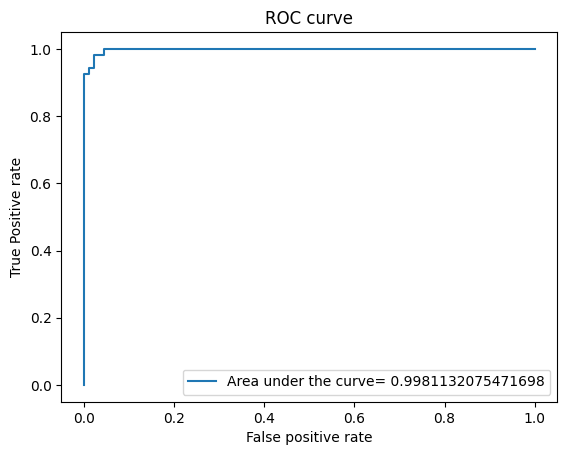

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt

# 读取数据集
data = pd.read_csv('wdbc.data', header=None)

# 数据预处理
X = data.iloc[:, 2:].values  # 特征
y = data.iloc[:, 1].values   # 标签

# 标签转换
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# 数据归一化
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)

# 定义 XGBoost 模型
xgb = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss')

# 定义超参数范围
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 4]
}

# 使用 GridSearchCV 进行超参数调优
clf = GridSearchCV(xgb, param_grid).fit(X_train, y_train)

# 输出模型性能
print('The score for this model is: ', clf.score(X_test, y_test))
print('the best parameters are: ', clf.best_params_)

# 模型预测
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# 定义评估函数
def evaluate(y_test, y_pred, y_pred_proba):
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print('The confusion matrix for the given model is: ')
    print(cnf_matrix)
    print('accuracy : ', metrics.accuracy_score(y_test, y_pred))
    print('precision : ', metrics.precision_score(y_test, y_pred))
    print('recall : ', metrics.recall_score(y_test, y_pred))
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, label='Area under the curve= ' + str(auc))
    plt.legend(loc=4)
    plt.title('ROC curve')
    plt.xlabel('False positive rate')
    plt.ylabel('True Positive rate')

# 调用评估函数
evaluate(y_test, y_pred, y_pred_proba)

## 3.8 LDA + Breast Cancer

The score for this model is:  0.965034965034965
the best parameters are:  {'shrinkage': 'auto', 'solver': 'lsqr'}
The confusion matrix for the given model is: 
[[90  0]
 [ 5 48]]
accuracy :  0.965034965034965
precision :  1.0
recall :  0.9056603773584906


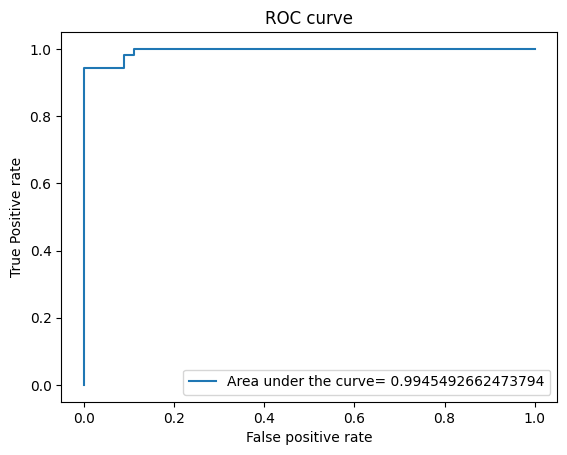

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings

# 读取数据集
data = pd.read_csv('wdbc.data', header=None)

# 数据预处理
X = data.iloc[:, 2:].values  # 特征
y = data.iloc[:, 1].values   # 标签

# 标签转换
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# 数据归一化
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)

# 定义LDA模型
lda = LinearDiscriminantAnalysis()

# 定义超参数范围，避免使用不支持的参数组合
param_grid = {
    'solver': ['lsqr', 'eigen'],  # 排除 'svd' 求解器
    'shrinkage': [None, 'auto']   # 只在支持的求解器下使用
}

# 使用GridSearchCV进行超参数调优
clf = GridSearchCV(lda, param_grid).fit(X_train, y_train)

# 输出模型性能
print('The score for this model is: ', clf.score(X_test, y_test))
print('the best parameters are: ', clf.best_params_)

# 模型预测
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# 定义评估函数
def evaluate(y_test, y_pred, y_pred_proba):
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print('The confusion matrix for the given model is: ')
    print(cnf_matrix)
    print('accuracy : ', metrics.accuracy_score(y_test, y_pred))
    print('precision : ', metrics.precision_score(y_test, y_pred))
    print('recall : ', metrics.recall_score(y_test, y_pred))
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, label='Area under the curve= ' + str(auc))
    plt.legend(loc=4)
    plt.title('ROC curve')
    plt.xlabel('False positive rate')
    plt.ylabel('True Positive rate')

# 调用评估函数
evaluate(y_test, y_pred, y_pred_proba)

## 3.9 Naive Bayes + Breast Cancer

The score for this model is:  0.916083916083916
the best parameters are:  {'var_smoothing': 1e-09}
The confusion matrix for the given model is: 
[[84  6]
 [ 6 47]]
accuracy :  0.916083916083916
precision :  0.8867924528301887
recall :  0.8867924528301887


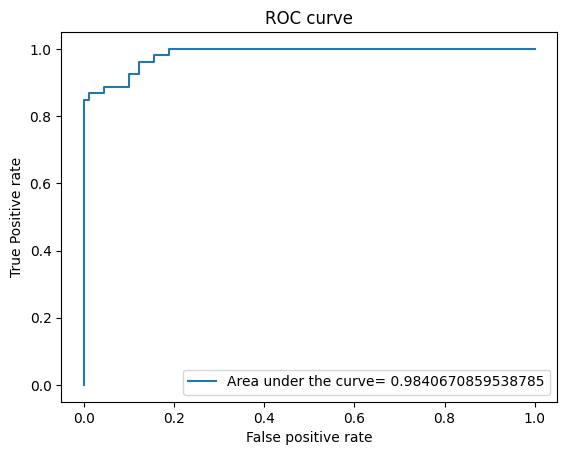

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt

# 读取数据集
data = pd.read_csv('wdbc.data', header=None)

# 数据预处理
X = data.iloc[:, 2:].values  # 特征
y = data.iloc[:, 1].values   # 标签

# 标签转换
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# 数据归一化
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)

# 定义朴素贝叶斯模型
nb = GaussianNB()

# 定义超参数范围
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

# 使用 GridSearchCV 进行超参数调优
clf = GridSearchCV(nb, param_grid).fit(X_train, y_train)

# 输出模型性能
print('The score for this model is: ', clf.score(X_test, y_test))
print('the best parameters are: ', clf.best_params_)

# 模型预测
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# 定义评估函数
def evaluate(y_test, y_pred, y_pred_proba):
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print('The confusion matrix for the given model is: ')
    print(cnf_matrix)
    print('accuracy : ', metrics.accuracy_score(y_test, y_pred))
    print('precision : ', metrics.precision_score(y_test, y_pred))
    print('recall : ', metrics.recall_score(y_test, y_pred))
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, label='Area under the curve= ' + str(auc))
    plt.legend(loc=4)
    plt.title('ROC curve')
    plt.xlabel('False positive rate')
    plt.ylabel('True Positive rate')

# 调用评估函数
evaluate(y_test, y_pred, y_pred_proba)

## 3.10 Maximal Entropy Model + Breast Cancer

The score for this model is:  0.965034965034965
the best parameters are:  {'C': 10, 'penalty': 'l2'}
The confusion matrix for the given model is: 
[[89  1]
 [ 4 49]]
accuracy :  0.965034965034965
precision :  0.98
recall :  0.9245283018867925


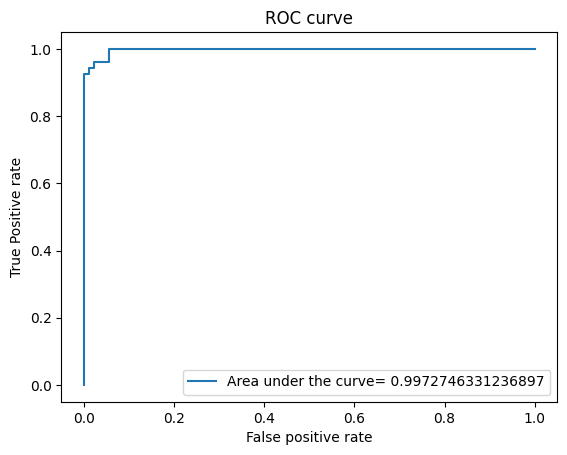

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt

# 读取数据集
data = pd.read_csv('wdbc.data', header=None)

# 数据预处理
X = data.iloc[:, 2:].values  # 特征
y = data.iloc[:, 1].values   # 标签

# 标签转换
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# 数据归一化
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)

# 定义最大熵模型（通过逻辑回归实现）
maxent = LogisticRegression(random_state=0)

# 定义超参数范围
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l2']
}

# 使用 GridSearchCV 进行超参数调优
clf = GridSearchCV(maxent, param_grid).fit(X_train, y_train)

# 输出模型性能
print('The score for this model is: ', clf.score(X_test, y_test))
print('the best parameters are: ', clf.best_params_)

# 模型预测
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# 定义评估函数
def evaluate(y_test, y_pred, y_pred_proba):
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print('The confusion matrix for the given model is: ')
    print(cnf_matrix)
    print('accuracy : ', metrics.accuracy_score(y_test, y_pred))
    print('precision : ', metrics.precision_score(y_test, y_pred))
    print('recall : ', metrics.recall_score(y_test, y_pred))
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, label='Area under the curve= ' + str(auc))
    plt.legend(loc=4)
    plt.title('ROC curve')
    plt.xlabel('False positive rate')
    plt.ylabel('True Positive rate')

# 调用评估函数
evaluate(y_test, y_pred, y_pred_proba)